# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [63]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['name']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount pearl
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | flying fish cove
Processing Record 5 of Set 1 | farjestaden
City not found. Skipping...
Processing Record 6 of Set 1 | kariapatti
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | tikamgarh
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | andorra
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | mechernich
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 

In [64]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount pearl,47.5166,-52.7813,15.19,93,40,5.66,Mount Pearl,1693373996
1,laguna,38.4210,-121.4238,25.35,54,0,1.54,Laguna,1693374274
2,port mathurin,-19.6833,63.4167,22.64,73,16,5.60,Port Mathurin,1693374002
3,flying fish cove,-10.4217,105.6791,25.82,78,100,6.17,Flying Fish Cove,1693374020
4,kariapatti,9.6751,78.0999,32.29,58,40,2.57,Kariapatti,1693374354


In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [67]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,15.19,93,40,5.66,Mount Pearl,1693373996
1,laguna,38.4210,-121.4238,25.35,54,0,1.54,Laguna,1693374274
2,port mathurin,-19.6833,63.4167,22.64,73,16,5.60,Port Mathurin,1693374002
3,flying fish cove,-10.4217,105.6791,25.82,78,100,6.17,Flying Fish Cove,1693374020
4,kariapatti,9.6751,78.0999,32.29,58,40,2.57,Kariapatti,1693374354


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

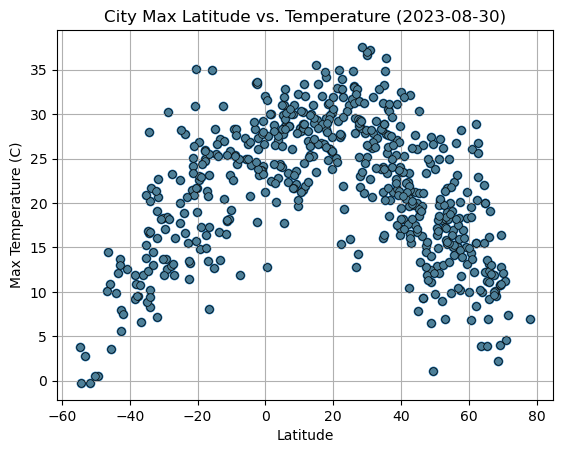

In [68]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color=(0.3, 0.5, 0.6), s=30, edgecolor='black', linewidth=0.5, zorder=2)

# Convert the 'Date' column to datetime format with UTC timezone
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s', utc=True)

# Convert UTC datetime to "YYYY-MM-DD" format
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
date = city_data_df['Date'][0]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.title(f'City Max Latitude vs. Temperature ({date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

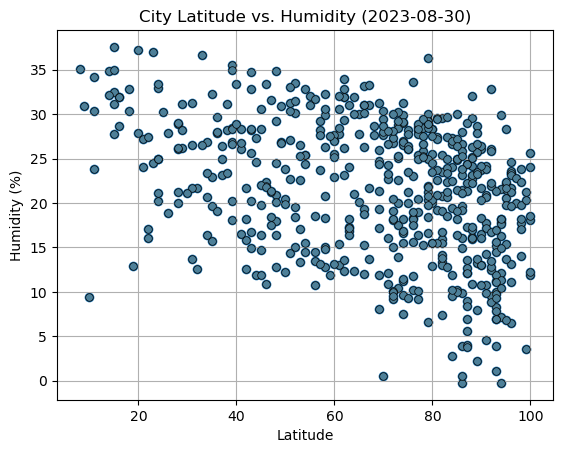

In [69]:
# Build scatter plot for latitude vs. Humidity
x_values = city_data_df['Humidity']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color=(0.3, 0.5, 0.6), s=30, edgecolor='black', linewidth=0.5, zorder=2)

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.title(f'City Latitude vs. Humidity ({date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

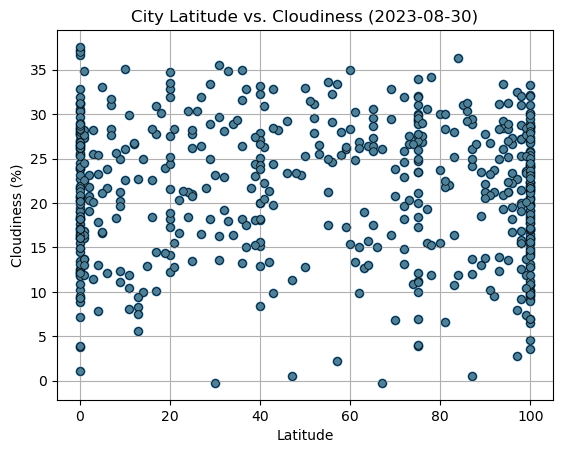

In [70]:
# Build scatter plot for latitude vs. Cloudiness
x_values = city_data_df['Cloudiness']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color=(0.3, 0.5, 0.6), s=30, edgecolor='black', linewidth=0.5, zorder=2)

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.title(f'City Latitude vs. Cloudiness ({date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

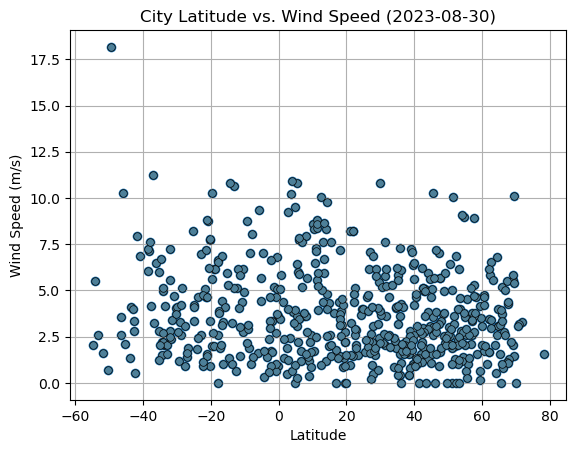

In [71]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color=(0.3, 0.5, 0.6), s=30, edgecolor='black', linewidth=0.5, zorder=2)

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.title(f'City Latitude vs. Wind Speed ({date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    print(f'The r-value is: {rvalue}')
    
    plt.annotate(line_eq,(x_values.mean(), y_values.min()),fontsize=15,color="red")
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,15.19,93,40,5.66,Mount Pearl,2023-08-30
1,laguna,38.4210,-121.4238,25.35,54,0,1.54,Laguna,2023-08-30
4,kariapatti,9.6751,78.0999,32.29,58,40,2.57,Kariapatti,2023-08-30
6,iqaluit,63.7506,-68.5145,3.85,86,75,2.06,Iqaluit,2023-08-30
7,tiksi,71.6872,128.8694,7.40,82,99,3.30,Tiksi,2023-08-30


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port mathurin,-19.6833,63.4167,22.64,73,16,5.60,Port Mathurin,2023-08-30
3,flying fish cove,-10.4217,105.6791,25.82,78,100,6.17,Flying Fish Cove,2023-08-30
5,mount isa,-20.7333,139.5000,30.87,9,41,8.75,Mount Isa,2023-08-30
8,port-aux-francais,-49.3500,70.2167,0.55,70,87,18.17,Port-aux-Français,2023-08-30
10,isangel,-19.5500,169.2667,23.06,88,100,10.29,Isangel,2023-08-30


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6786213242571023


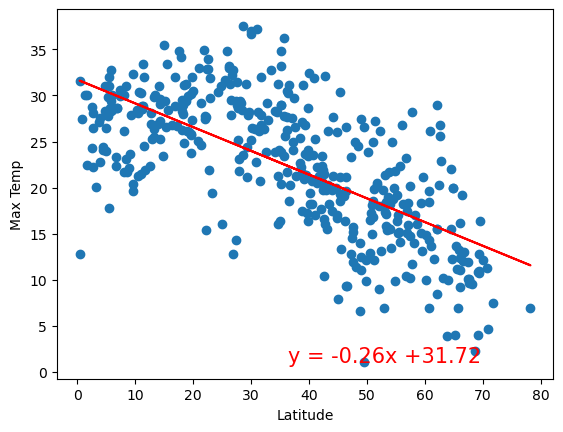

In [80]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

The r-value is: 0.7496000635870556


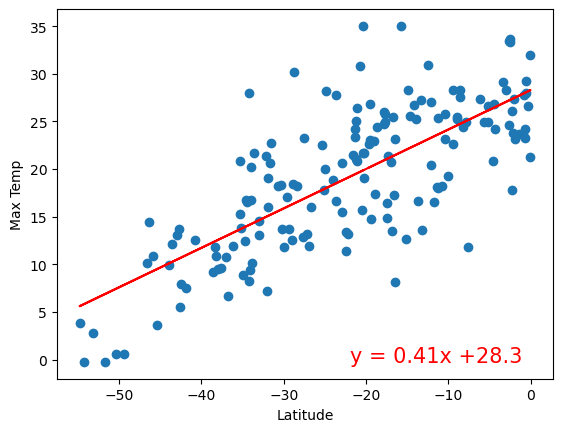

In [81]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

**Discussion about the linear relationship:** 

**Max Temperature vs Latitude**
*	**Northern Hemisphere:**
       * Rvalue of -0.68 is high and suggest strong negative relationship between temperature and latitude.
       * Temperature decreases as Latitude increases. This make sense since temperature drop lower as we head to North pole.
*	**Southern Hemisphere:** 
       - Rvalue of 0.75 is high and suggest strong positive relationship between temperature and latitude.
       - Temperatute increases as Latitude increases.  Same effect as above and temperature do rise as we get closer to Equator line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.008970694028798108


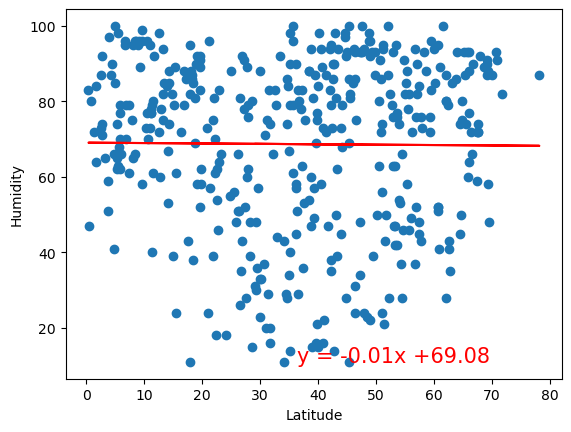

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

The r-value is: 0.0757604888082926


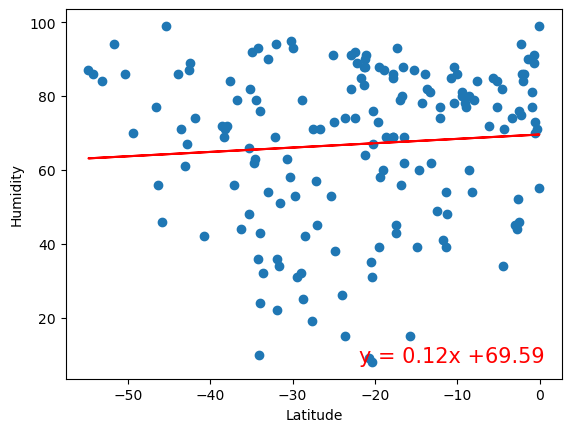

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

**Discussion about the linear relationship:** 

**Humidity vs Latitude**
*	**Northern Hemisphere:**
       * Rvalue of -0.01 suggest a very weak negative relationship between humidity and latitude.
       * The scatter plot is too wide spread to make any meaningful conclusion.
*	**Southern Hemisphere:** 
       - Rvalue of 0.08 suggest a very weak positive relationship between humidity and latitude.
       - The scatter plot is also too wide spread to make any meaningful conclusion.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06825134342550594


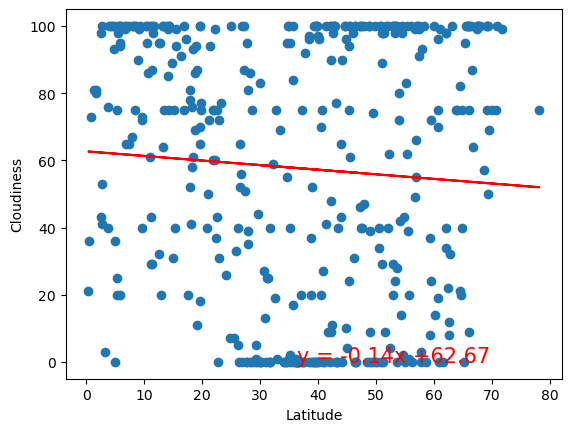

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

The r-value is: 0.10364143766422257


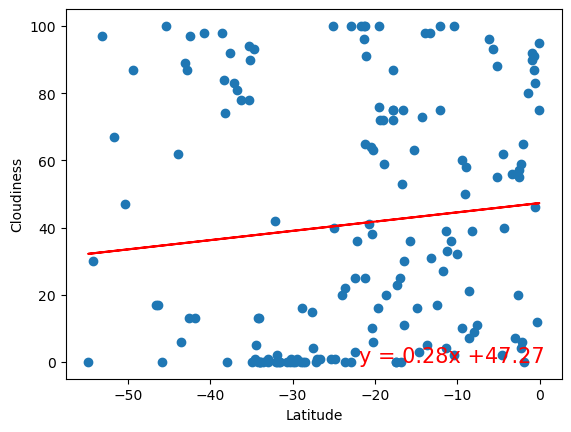

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

**Discussion about the linear relationship:**

**Cloudiness vs Latitude**
*	**Northern Hemisphere:**
       * Rvalue of -0.07 suggest a very weak negative relationship between cloudiness and latitude.
       * The scatter plot is too wide spread to make any meaningful conclusion.
*	**Southern Hemisphere:** 
       - Rvalue of 0.01 suggest a very weak positive relationship between cloudiness and latitude.
       - The scatter plot is also too wide spread to make any meaningful conclusion.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15968453484321415


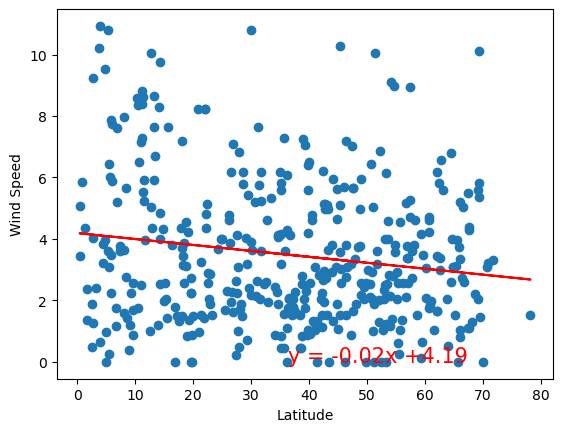

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

The r-value is: -0.08523747495817711


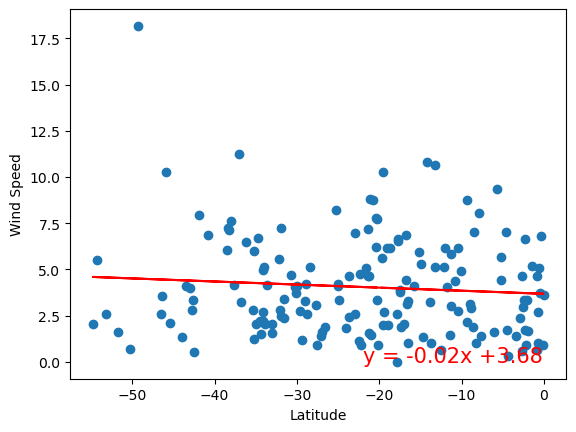

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
perform_and_plot_linear_regression(x_values, y_values, xlabel, ylabel)

**Discussion about the linear relationship:**

**Wind Speed vs Latitude**
*	**Northern Hemisphere:**
       * Rvalue of -0.16 suggest a weak negative relationship between wind speed and latitude.
       * The scatter plot is too wide spread to make any meaningful conclusion.
*	**Southern Hemisphere:** 
       - Rvalue of -0.09 suggest a weak negative relationship between wind speed and latitude.
       - The scatter plot is also too wide spread to make any meaningful conclusion.